在Jupyter notebook中执行%matplotlib notebook

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


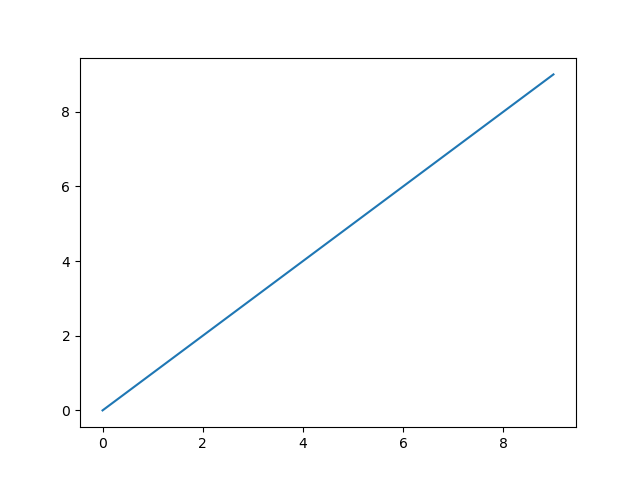

In [9]:
import numpy as np

data = np.arange(10)
data
plt.plot(data)

## Figure and Subplot
* matplotlib的图像都位于Figure对象中,可以用plt.figure创建一个新的Figure

* "k--"是一个线型选项,用于告诉matplotlib回执黑色虚线图.
* 由fig.add_subplot所返回的对象是AxesSubplot对象,直接调用他们的实例方法就可以在其他空的格子里画图了.

<IPython.core.display.Javascript object>


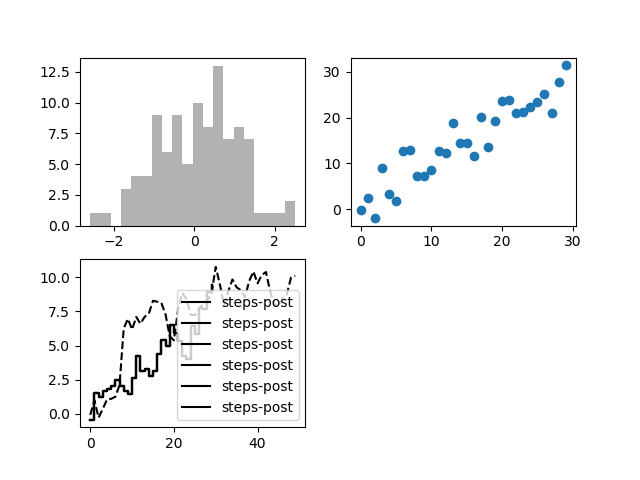

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

* 如果这时执行一条绘图命令,matplotlib会在最后一个用过的subplot上进行回执,隐藏创建figure和subplot的过程.

In [40]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

<IPython.core.display.Javascript object>


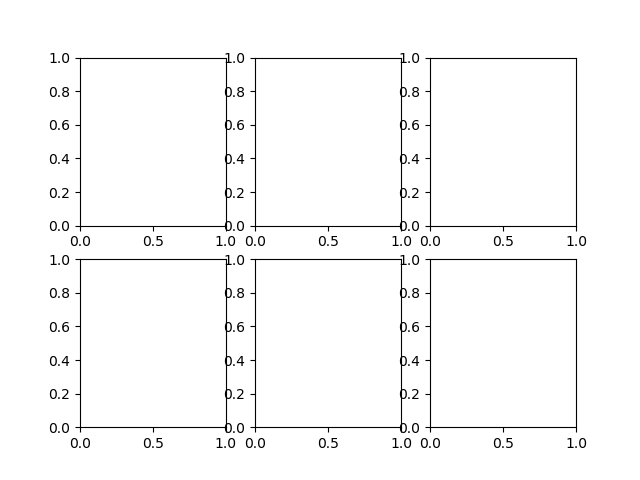

In [31]:
fig, axes = plt.subplots(2, 3)

In [32]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74e98a5438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f74e97a5b70>]], dtype=object)

## 调整subplot周围的间距
* 默认情况下,matplotlib会在subplot外围留下一定的边距, 并在subplot之间留下一定的间距.
* 间距跟图像的高度和宽度有关,因此,如果你调整了图像大小(不管是编程还是手工)间距也会自动调整.
* 利用Figure的subplots_adjust方法可以修改间距, 此外, 它也是个顶级函数

In [34]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

<IPython.core.display.Javascript object>


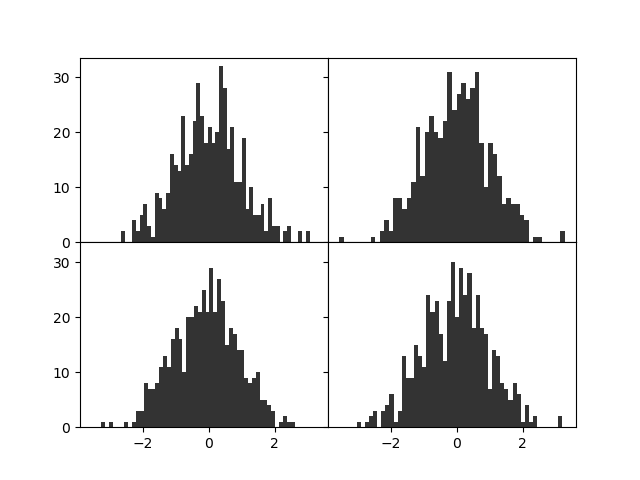

In [36]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.8)
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色,标记和线型
* matplotlib的plot函数接受一组X和Y坐标, 还可以接受一个表示颜色和线型的字符串缩写
例如,要根据x和y绘制出绿色虚线
```python
ax.plot(x, y, 'g--')
```

* 常用的颜色可以使用颜色的缩写,也可以指定颜色码.
* 线图可以使用标记强调数据点.因为matplotlib可以创建连续线图,在点之间进行插值,因此有事可能不太容易看出真实数据点的位置
* 标记也可以放到格式字符串中,但标记和线型必须放在颜色后面

<IPython.core.display.Javascript object>


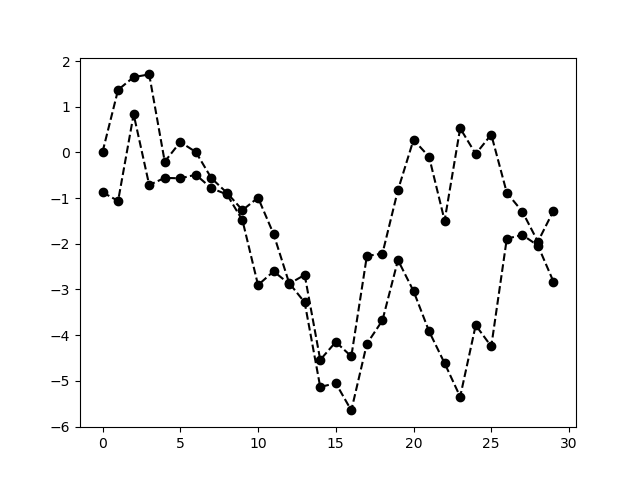

In [49]:
from numpy.random import randn
fig = plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

* 在线型图中,非实际数据点默认是按线型方式插值的,可以通过drawstyle选项修改

<IPython.core.display.Javascript object>


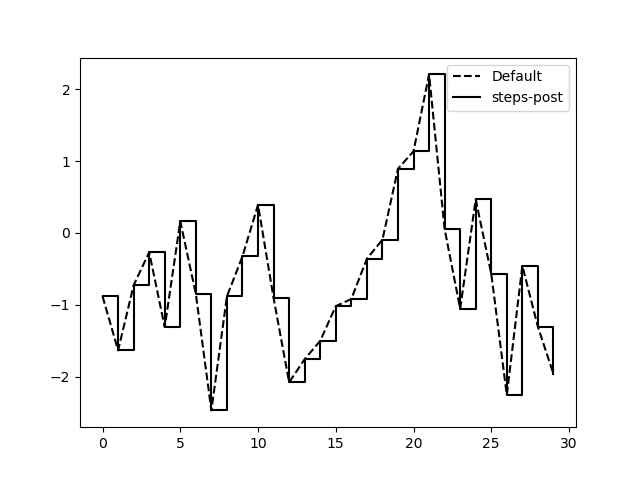

In [60]:
data = np.random.randn(30).cumsum()
fig = plt.figure()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

* 必须调用plt.legend(或使用ax.legend,如果引用了轴的话)来创建图例,无论绘图时是否传递label表桥选项

## 设置标题,轴标签,刻度以及刻度标签

<IPython.core.display.Javascript object>


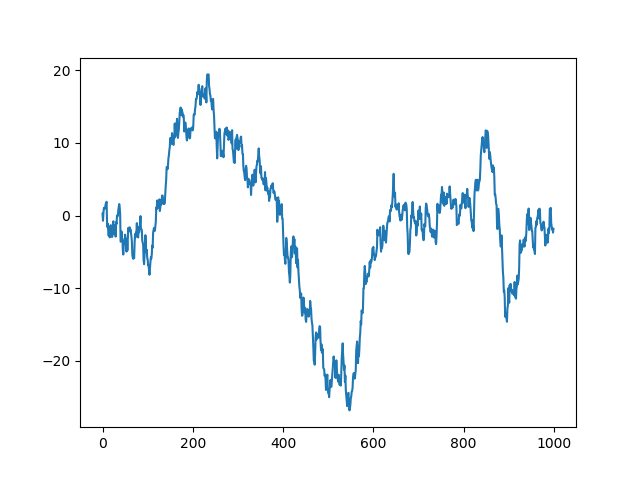

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

- 要改变x轴刻度,最简单的办法是使用set_xticks和set_xticklabels.
- set_xticks告诉matplotlib要将刻度放在数据范围中的哪些位置,默认情况下,这些位置也就是刻度标签.
- set_xticklabels可以将任何其他的值作用标签

<IPython.core.display.Javascript object>


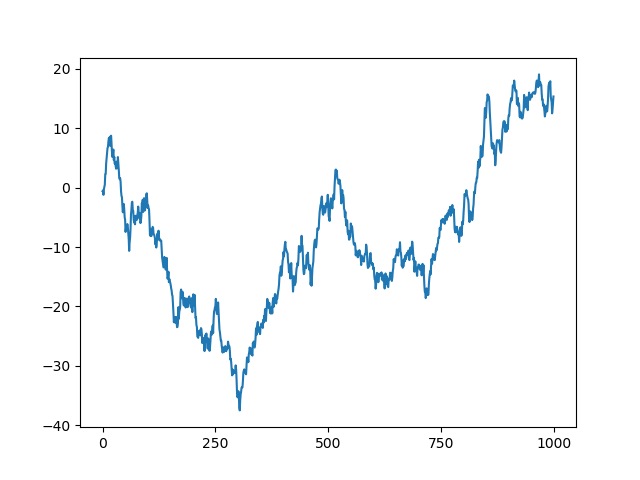

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
#lables = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
#                           rotation=30, fontsize='small')

<IPython.core.display.Javascript object>


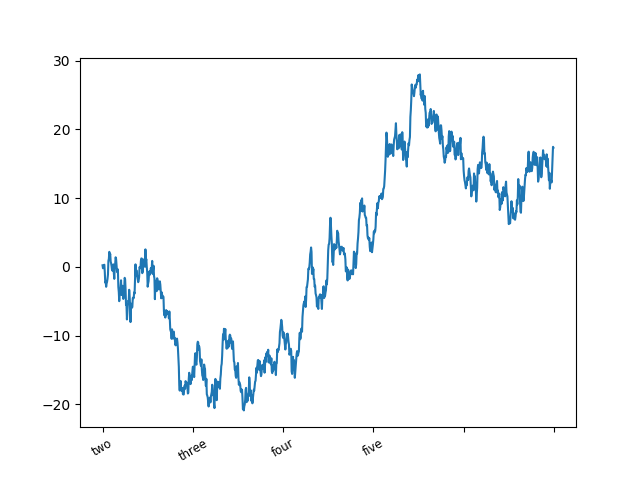

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
lables = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                          rotation=30, fontsize='small')

- Y轴的修改方式与此类似,只需将上述代码中的x替换为y即可.轴的类有集合方法,可以批量设定绘图选项.
前面的例子也可写为
```python
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'stages'
}
ax.set(**props)
```

<IPython.core.display.Javascript object>


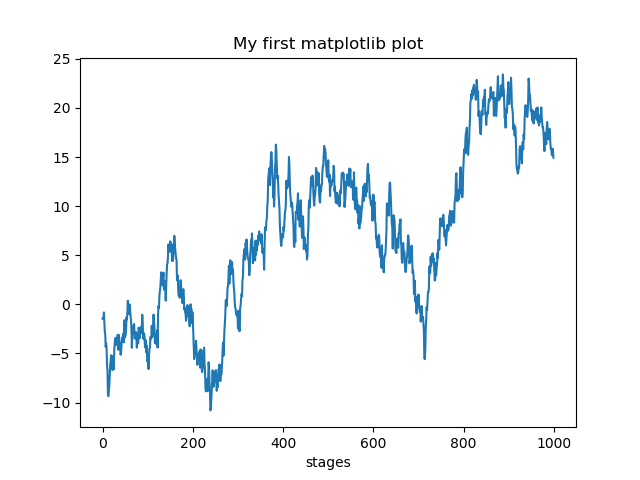

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
props = {
  'title': 'My first matplotlib plot',
  'xlabel': 'stages'
}
ax.set(**props)
ax.plot(np.random.randn(1000).cumsum())

## 添加图例
- 图例(legend)是另一种用于标识图表元素的重要工具.添加图例的方式由多种,最简单的实在添加subplot的时候传入label参数

<IPython.core.display.Javascript object>


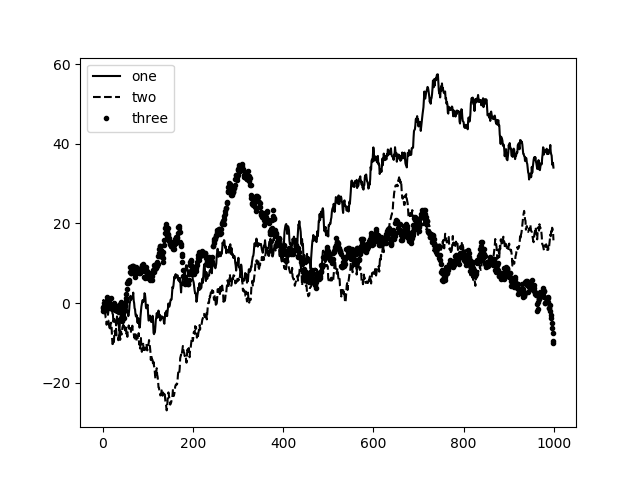

In [79]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best') # loc告诉matplotlib要将图例放在哪.

## 注解以及在Subplot上绘图
* 除标准绘图类型,还可以绘制一些子集的注解,可能是文本,箭头或其他图形等.
* 注解和文字可以通过text, arrow和annotate函数进行添加.
* text可以将文本绘制在图表的指定坐标(x, y),还可以加上一些自定义的格式:
```python
ax.text(x, y, 'Hello World!',
        family='monosapce', fontsize=10)```

- 注解可以既含有文本也含有箭头.